In [1]:
using DelimitedFiles, FileIO
using Plots, Rsvg, LaTeXStrings
using Chemfiles, JUMD, NamedArrays
using LinearAlgebra, Statistics
pdb = "1f96"
casa_ca = string("/home/pbarletta/labo/20/bisana/run/carmn_1f96")
casa_pca = string("/home/pbarletta/labo/20/bisana/run/pca_1f96")
casa_20 = string("/home/pbarletta/labo/20/bisana/run/20_1f96")
casa_nma_16 = string("/home/pbarletta/labo/20/bisana/run/nma_", pdb, "_16")
casa_nma_10 = string("/home/pbarletta/labo/20/bisana/run/nma_", pdb, "_10")
rtdos = "/home/pbarletta/labo/20/bisana/rtdos_log"

"/home/pbarletta/labo/20/bisana/rtdos_log"

### Volúmenes de cavidades 1F96

In [2]:
n_rmn = 20
vol_ecf = Array{Float64, 1}(undef, n_rmn)
vol_edf = Array{Float64, 1}(undef, n_rmn)

for i in 1:n_rmn
    vol_ecf[i] = convert(Float64, readdlm(joinpath(
        casa_nma_16, "cavidad", string("vol_ecf_", i)))[1, 2])
    vol_edf[i] = convert(Float64, readdlm(joinpath(
        casa_nma_16, "cavidad", string("vol_edf_", i)))[1, 2])
end

vol = [ vol_ecf ; vol_edf];

### Flexibilidad con modos de Calpha

In [3]:
global flx_ecf_ca = Array{Float64, 1}(undef, n_rmn)
global flx_edf_ca = Array{Float64, 1}(undef, n_rmn)

for i in 1:n_rmn
    flx_ecf_ca[i] = convert(Float64, readdlm(joinpath(
        casa_nma_16, "cavidad", string(i, "_flx_ecf_5")))[1, 2]) 
    flx_edf_ca[i] = convert(Float64, readdlm(joinpath(
        casa_nma_16, "cavidad", string(i, "_flx_edf_5")))[1, 2]) 
end

flx_nma = [flx_ecf_ca ; flx_edf_ca];

## Resultados

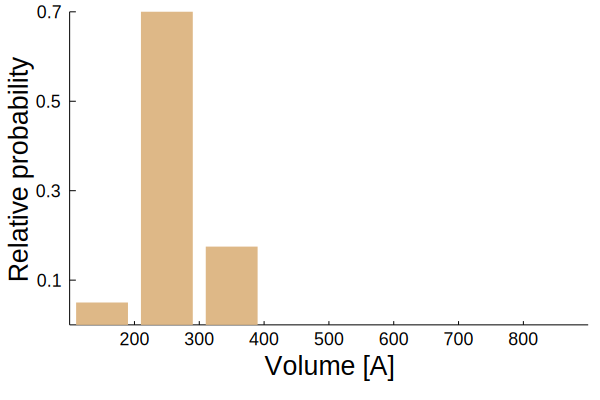

In [4]:
st = 100
min_vol = 100
max_vol = 900
bin_vol = collect(min_vol:st:max_vol)
wgh_vol = fill(1.0, length(vol))

# Histograma ponderado
Wbins_vol_acb, Whis_vol_acb = JUMD.weightedHist(vol, bin_vol, wgh_vol, true, false);

plt_his_vol = bar(Wbins_vol_acb, Whis_vol_acb,
    xlims = (min_vol, max_vol),
    xticks = min_vol+st:st:max_vol-st,
    yticks = .1:.2:.7, ylims = (0, .7),
    linecolor = false, fillcolor = Colors.colorant"BurlyWood",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "Volume [A]
    ")

In [5]:
savefig(plt_his_vol, joinpath(rtdos, string("vol_1f96", ".svg")))

In [6]:
flx_ecf_nmr_pca = readdlm(joinpath(casa_20, "flx_ecf_5"))[1, 2]
flx_edf_nmr_pca = readdlm(joinpath(casa_20, "flx_edf_5"))[1, 2]

flx_nmr_pca = mean([ flx_ecf_nmr_pca ; flx_edf_nmr_pca ])


flx_acb_md_pca = readdlm(joinpath(casa_pca, "flx_ecf_5"))[1, 2]
flx_adb_md_pca = readdlm(joinpath(casa_pca, "flx_edf_5"))[1, 2]
flx_md_pca = mean([ flx_acb_md_pca ; flx_adb_md_pca ])

NamedArray([ mean(vol) std(vol) std(vol) / mean(vol) ;
     mean(flx_nma) std(flx_nma) std(flx_nma) / mean(flx_nma) ;
       flx_nmr_pca 0 0 ;
        flx_md_pca 0 0 ],
    ([ "Volume" ; "Rigidity NMA" ; "Rigidity NMR PCA" ; "Rigidity MD PCA"],
        ["μ" ; "std" ; "std / μ"]))

4×3 Named Array{Float64,2}
           A ╲ B │          μ         std     std / μ
─────────────────┼───────────────────────────────────
Volume           │    273.057     41.4703    0.151874
Rigidity NMA     │  0.0451637  0.00437746   0.0969243
Rigidity NMR PCA │  0.0387626         0.0         0.0
Rigidity MD PCA  │  0.0882876         0.0         0.0

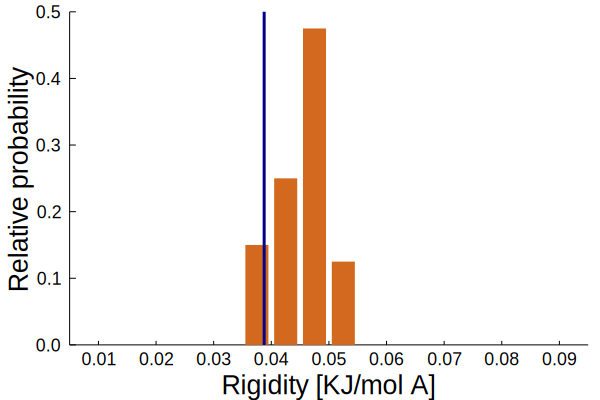

In [7]:
st = 0.005
min_rig = 0.01
max_rig = 0.09
bin_rig = collect(min_rig:st:max_rig)
wgh_rig = fill(1.0, length(flx_nma))

Wbins_rig_acb, Whis_rig_acb = JUMD.weightedHist(flx_nma, bin_rig, wgh_rig, true, false);

plt_his_rig = bar(Wbins_rig_acb, Whis_rig_acb,
    xlims = (min_rig-st, max_rig+st), ylims = (0, .5),
    xticks = min_rig:1E-2:max_rig,
    name = "1F96",
    legend = false,
    linecolor = false, fillcolor = Colors.colorant"Chocolate",
    grid = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "Rigidity [KJ/mol A]")

plot!([flx_nmr_pca], seriestype = "vline",
    linecolor = "DarkBlue", linewidth = 3)

In [8]:
savefig(plt_his_rig, joinpath(rtdos, string("rig_1f96_carmn", ".svg")))

In [9]:
vol = [ vol_ecf ; vol_edf]
flx_ca_10 = [ flx_ecf_ca_10 ; flx_edf_ca_10]

NamedArray([ mean(vol) std(vol) std(vol) / mean(vol) ;
     mean(flx_ca_10) std(flx_ca_10) std(flx_ca_10) / mean(flx_ca_10) ],
    ([ "Volume" ; "Rigidity NMA"], ["μ" ; "std" ; "std / μ"]))

vol = [ vol_ecf ; vol_edf]
flx_nma = [ flx_ecf_ca_15 ; flx_edf_ca_15]

NamedArray([ mean(vol) std(vol) std(vol) / mean(vol) ;
     mean(flx_nma) std(flx_nma) std(flx_nma) / mean(flx_nma) ],
    ([ "Volume" ; "Rigidity NMA"], ["μ" ; "std" ; "std / μ"]))

vol = [ vol_ecf ; vol_edf]
flx_ca_16 = [ flx_ecf_ca_16 ; flx_edf_ca_16]

NamedArray([ mean(vol) std(vol) std(vol) / mean(vol) ;
     mean(flx_ca_16) std(flx_ca_16) std(flx_ca_16) / mean(flx_ca_16) ],
    ([ "Volume" ; "Rigidity NMA"], ["μ" ; "std" ; "std / μ"]))

LoadError: UndefVarError: flx_ecf_ca_10 not defined

In [10]:
NamedArray([ mean(flx_nma) std(flx_nma) std(flx_nma) / mean(flx_nma) ;
     flx_nmr_pca 0. 0.],
    (["NMR NMA" ; "NMR PCA" ], ["μ" ; "std" ; "μ/std"]))

2×3 Named Array{Float64,2}
  A ╲ B │          μ         std       μ/std
────────┼───────────────────────────────────
NMR NMA │  0.0451637  0.00437746   0.0969243
NMR PCA │  0.0387626         0.0         0.0

## RMSD

In [11]:
n_rmn = 20
n_rms = n_rmn * (n_rmn - 1) / 2
rmsds = readdlm(joinpath(casa_20, "pdbs", "all_rmsd"))[:, 1];

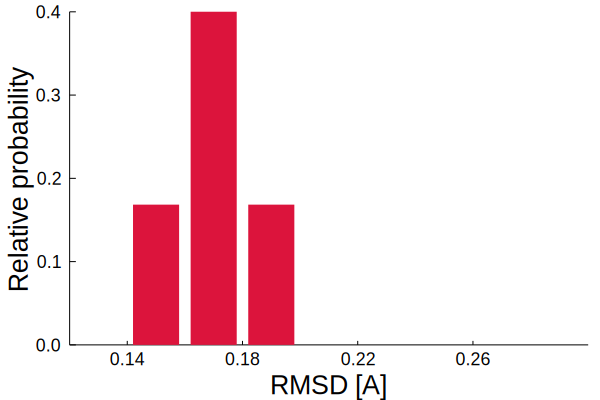

In [12]:
st = 0.02
min_rms = 0.14
max_rms = 0.28
bin_rms = collect(min_rms:st:max_rms)
wgh_rms = fill(1.0, length(rmsds))

Wbins_rms, Whis_rms = JUMD.weightedHist(rmsds, bin_rms, wgh_rms, true, false); 

plt_his_rms = bar(Wbins_rms, Whis_rms,
    xlims = (min_rms-st, max_rms+st), ylims = (0, .4),
    xticks = min_rms:st*2:max_rms,
    name = "1F96",
    legend = false,
    linecolor = false, fillcolor = Colors.colorant"Crimson",
    grid = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    yaxis = "Relative probability", xaxis = "RMSD [A]")

plot!([flx_nmr_pca], seriestype = "vline",
    linecolor = "DarkBlue", linewidth = 3)

In [13]:
savefig(plt_his_rms, joinpath(rtdos, string("rms_1f96", ".svg")))

In [14]:
NamedArray([ mean(rmsds) std(rmsds) std(rmsds) / mean(rmsds) ],
    (["RMSD CA" ], ["μ" ; "std" ; "μ/std"]))

1×3 Named Array{Float64,2}
  A ╲ B │         μ        std      μ/std
────────┼────────────────────────────────
RMSD CA │  0.169425  0.0103914  0.0613336